In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import os

In [3]:
os.chdir("D:\\32189\\python  pyCharm 代码\\项目1\\")

In [4]:
data=pd.read_csv("lianjia—shangrao数据.csv.csv")

In [5]:
## 3) 判断是否有缺失值
data.isnull().sum()

成交小区       1770
成交价（万元）    1770
成交楼层       1770
单价每平（元）    1770
朝向         1770
成交时间       1770
dtype: int64

In [6]:
#删除缺省值
data.dropna(inplace = True)

In [7]:
#检查是否删除空值
data.isnull().sum()

成交小区       0
成交价（万元）    0
成交楼层       0
单价每平（元）    0
朝向         0
成交时间       0
dtype: int64

In [8]:
## 1）数据总体情况
print(f'样本量共有 {data.shape[0]} 行')

样本量共有 1770 行


In [9]:
## 4) 查看数据类型
data.dtypes

成交小区        object
成交价（万元）    float64
成交楼层        object
单价每平（元）    float64
朝向          object
成交时间        object
dtype: object

In [10]:
#重复值处理
data.drop_duplicates(inplace=True)

In [11]:
## 1）数据总体情况
print(f'处理后样本量共有 {data.shape[0]} 行')

处理后样本量共有 1770 行


In [12]:
# 描述性分析
data.describe()
#该地区的平均总价为86.102万元，最小成交价为15万元，最贵的房子为728万元
#该地区的平均单价为每平8083.34元，最便宜的为每平1061元，


,成交价（万元）,单价每平（元）
count,1770.000000,1770.000000
mean,86.019774,8080.804520
std,44.852010,2095.435224
min,10.000000,1061.000000
25%,58.000000,6669.750000
50%,82.000000,7826.000000
75%,105.000000,9285.250000
max,728.000000,36211.000000


In [13]:
data.head()

,成交小区,成交价（万元）,成交楼层,单价每平（元）,朝向,成交时间
1,龙华世纪城 3室2厅 127.23平米,97.0,中楼层(共33层) 板楼,7585.0,南|毛坯,2021.04.01
3,博能信江府 4室2厅 169平米,129.0,中楼层(共29层) 暂无数据,7627.0,南|毛坯,2021.04.01
5,东苑小区 2室2厅 99.63平米,56.0,高楼层(共9层) 平房,5621.0,南|简装,2021.04.01
7,鹏辉中粮广场 4室2厅 104.84平米,110.0,低楼层(共28层) 塔楼,10493.0,南|精装,2021.04.01
9,龙湖一品 3室2厅 127平米,131.0,高楼层(共17层) 板楼,10315.0,东南|精装,2021.03.31


In [14]:
#python DataFrame筛选符合特定条件的行,查看最贵的房子的详细信息
data[data['成交价（万元）']==max(data['成交价（万元）'])]

,成交小区,成交价（万元）,成交楼层,单价每平（元）,朝向,成交时间
1389,万和·九龙湖 8室3厅 338.32平米,728.0,低楼层(共3层) 塔楼,21519.0,北南|其他,2020.12.25


In [15]:
#查看成交单价超过300万元的成交单字，数目占比不大可当异常值处理
(data['成交价（万元）'] > 300.0).sum()

5

In [16]:
# 将高于房价300万的删除,当作异常值进行处理
data.drop(index = data[data['成交价（万元）'] > 300.0].index, inplace=True)

In [17]:
#新增一列月份
data.loc[:,"月份"]=data["成交时间"].map(lambda x:x[:7])
data.loc[:,'小区'] = data['成交小区'].map(lambda x:x.split()[0])
data.loc[:,'户型'] = data['成交小区'].map(lambda x:x.split()[1])

In [18]:
#避免格式不对会造成数据格式转换错误，过滤格式不符的行
(data['成交小区'].str.split().map(len) != 3).sum()

2

In [19]:
#以两个空格为格式
data=data[data['成交小区'].str.split().map(len) == 3]

In [20]:
data.loc[:,'面积'] = data['成交小区'].map(lambda x:x.split()[2])

In [21]:
del data["成交小区"]

In [22]:
data.loc[:,'楼层'] = data['成交楼层'].map(lambda x:x.split("(")[0])
data.loc[:,'楼型'] = data['成交楼层'].map(lambda x:x.split(")")[1])
data.loc[:,'朝向细节'] = data['朝向'].map(lambda x:x.split("|")[0])
data.loc[:,'装修'] = data['朝向'].map(lambda x:x.split("|")[1])

In [23]:
del data["朝向"]

In [24]:
data['面积'] = data['面积'].str.replace('平米','').astype(np.float32)

In [25]:
data['面积'] = data['面积'].astype(np.int)

In [48]:
#如果
louceng=["南","南北","东南"]
data["朝向细节"]=['其它' if i not in louceng else i for i in data["朝向细节"]]

In [49]:
#对朝向进行统计，太多特殊朝向，所以将特殊朝向改为”其它“
data["朝向细节"].value_counts()

南     1109
南北     337
东南     176
其它     141
Name: 朝向细节, dtype: int64

In [29]:
print("上饶二手房的平均单价为：{}元/每平".format(round(data["单价每平（元）"].mean(),2)))

上饶二手房的平均单价为：8060.07元/每平


In [32]:
y1= round(data.groupby(by=['月份'])['成交价（万元）'].sum(),2)

In [33]:
y1

月份
2020.08    16711.0
2020.09    18977.0
2020.10    20256.0
2020.11    19909.0
2020.12    16281.0
2021.01    18992.0
2021.02    13947.0
2021.03    24131.0
2021.04      392.0
Name: 成交价（万元）, dtype: float64

In [34]:
#设置字体
mpl.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus']=False

'\n2021年3月份成交额最大，紧接着后一个月2021年2月成交额最小，其它月份波动不大\n'

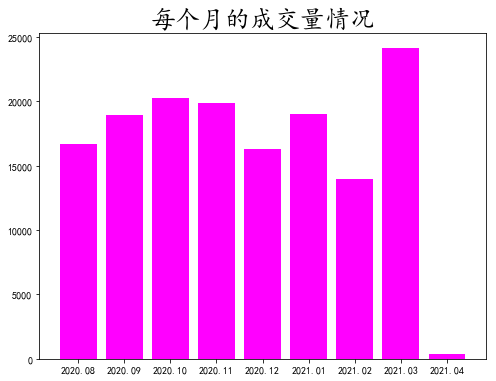

In [64]:
plt.figure(figsize=(8,6))
plt.title("每个月的成交量情况",fontsize=25)
plt.bar(y1.index,y1,color="Fuchsia")
'''
2021年3月份成交额最大，前一个月2021年2月成交额最小，其它月份波动不大
'''

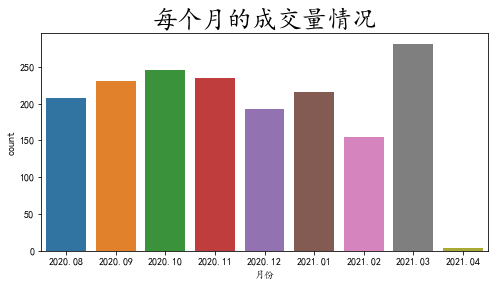

In [65]:
#sns.countplot()函数,以bar的形式展示每个类别的数量
plt.figure(figsize=(8,4))
plt.title("每个月的成交量情况",fontsize=25)
order = sorted(data['月份'].value_counts().index)
sns.countplot(x=data['月份'],order=order)
#每个月的成交量和每月成交额基本吻合

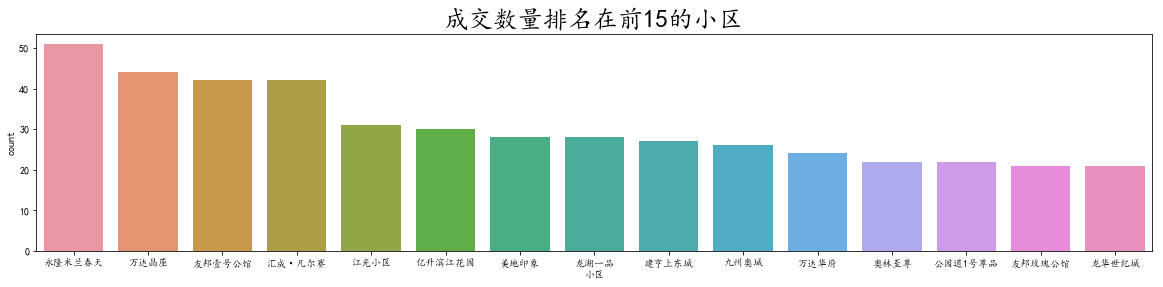

In [66]:
plt.figure(figsize=(20,4))
#统计小区的房数,打印拍前面成交数量前15的小区
plt.title("成交数量排名在前15的小区",fontsize=25)
top15=data['小区'].value_counts()[:15].index
sns.countplot(x=data['小区'],order=top15)

In [40]:
print(top15)

Index(['永隆米兰春天', '万达晶座', '汇成·凡尔赛', '友邦壹号公馆', '江光小区', '亿升滨江花园', '龙湖一品', '美地印象',
       '建亨上东城', '九州奥城', '万达华府', '奥林至尊', '公园道1号尊品', '龙华世纪城', '友邦玫瑰公馆'],
      dtype='object')


D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


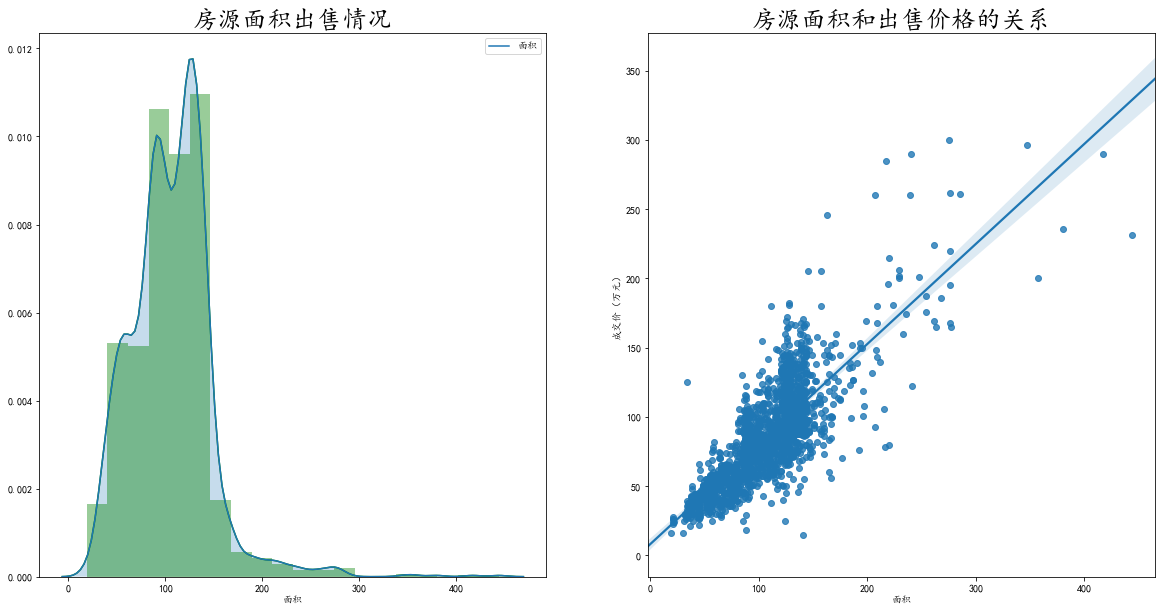

In [67]:
f,[ax1,ax2] = plt.subplots(1,2,figsize = (20,10))
ax1.set_title('房源面积出售情况',fontsize=25)
ax2.set_title('房源面积和出售价格的关系',fontsize=25)
#通过柱状图可知，房源面积大多超过100平米以上
x3=data["面积"]
sns.distplot(x3,bins = 20,ax = ax1,color = 'g')
sns.kdeplot(x3,shade = True,ax = ax1)

# 建房面积和出售价格的关系,画散点图，基本呈线上关系
sns.regplot(x = '面积',y = '成交价（万元）',data = data,ax =ax2)

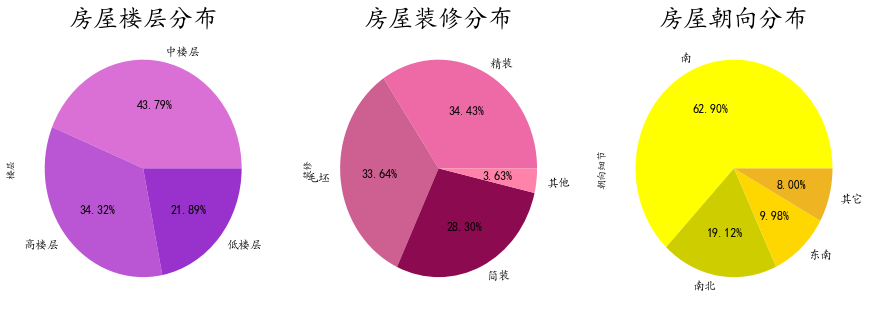

In [68]:
#由图像知中低高楼层、装修、朝向占比分布
f,[ax1,ax2,ax3] = plt.subplots(1,3,figsize = (20,10))
color1=["#DA70D6","#BA55D3","#9932CC"]
color2=["#EE6AA7","#CD6090","#8B0A50","#FF82AB"]
color3=["#FFFF00","#CDCD00","#FFD700","#EEB422"]
ax1.set_title('房屋楼层分布',fontsize=25)
ax2.set_title('房屋装修分布',fontsize=25)
ax3.set_title('房屋朝向分布',fontsize=25)
data["楼层"].value_counts().plot.pie(autopct='%.2f%%',colors=color1,ax = ax1,fontsize=12,figsize=(15,5))
data["装修"].value_counts().plot.pie(autopct='%.2f%%',colors=color2,ax = ax2,fontsize=12,figsize=(15,5))
data["朝向细节"].value_counts().plot.pie(autopct='%.2f%%',colors=color3,ax = ax3,fontsize=12,figsize=(15,5))

Text(0,0.5,'户型')

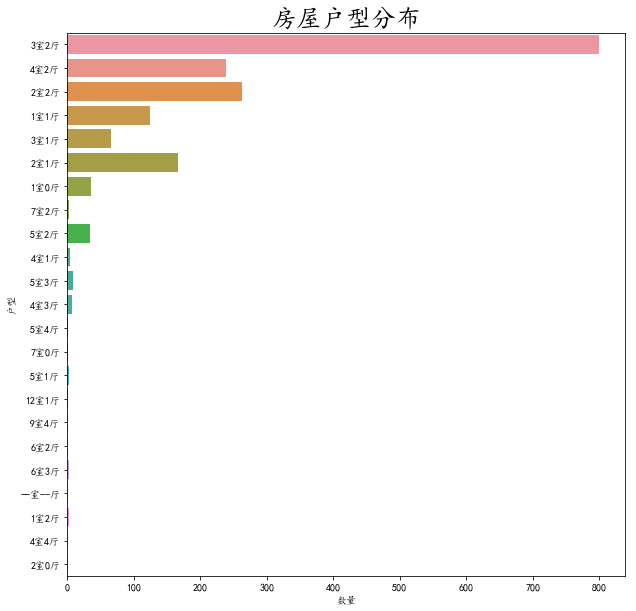

In [45]:
#房屋户型分布：3室2厅最多，然后4室2厅
f,ax1 = plt.subplots(figsize = (10,10))
sns.countplot(y = '户型',data = data,ax = ax1)
ax1.set_title('房屋户型分布',fontsize=25)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

In [40]:
data

,成交价（万元）,成交楼层,单价每平（元）,成交时间,月份,小区,户型,面积,楼层,楼型,朝向细节,装修
1,97.0,中楼层(共33层) 板楼,7585.0,2021.04.01,2021.04,龙华世纪城,3室2厅,127,中楼层,中楼层,南,毛坯
3,129.0,中楼层(共29层) 暂无数据,7627.0,2021.04.01,2021.04,博能信江府,4室2厅,169,中楼层,中楼层,南,毛坯
5,56.0,高楼层(共9层) 平房,5621.0,2021.04.01,2021.04,东苑小区,2室2厅,99,高楼层,高楼层,南,简装
7,110.0,低楼层(共28层) 塔楼,10493.0,2021.04.01,2021.04,鹏辉中粮广场,4室2厅,104,低楼层,低楼层,南,精装
9,131.0,高楼层(共17层) 板楼,10315.0,2021.03.31,2021.03,龙湖一品,3室2厅,127,高楼层,高楼层,东南,精装
11,114.0,中楼层(共7层) 板楼,9276.0,2021.03.31,2021.03,嘉怡华府,3室2厅,122,中楼层,中楼层,南,毛坯
13,87.0,中楼层(共11层) 板楼,7149.0,2021.03.31,2021.03,建亨上东城,3室2厅,121,中楼层,中楼层,南,毛坯
15,100.0,中楼层(共18层) 板楼,8023.0,2021.03.31,2021.03,信州壹号,3室2厅,124,中楼层,中楼层,南,毛坯
17,30.0,低楼层(共29层) 塔楼,8677.0,2021.03.31,2021.03,万达晶座,1室1厅,34,低楼层,低楼层,南,精装
19,84.0,低楼层(共11层) 板楼,9334.0,2021.03.31,2021.03,万嘉国际花园,2室2厅,90,低楼层,低楼层,东南,毛坯
